Project: Titanic prediction- machine learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#setindex
train_df.set_index(train_df.PassengerId, inplace = True)
train_df.drop('PassengerId', axis = 1, inplace = True)


In [8]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
test_df = pd.read_csv('test.csv', index_col = 'PassengerId')


In [10]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [13]:
train_df["Survived"]= train_df["Survived"].astype("category")
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [15]:
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [17]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Distribution of category features

In [18]:
train_df.describe(include =["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


Exploratory Data Analysis (EDA)

In [19]:
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [20]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


In [21]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<AxesSubplot:xlabel='Sex', ylabel='count'>

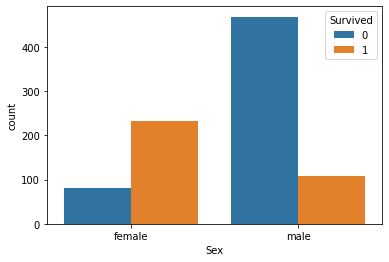

In [22]:
sns.countplot(data=train_df, x = 'Sex', hue = 'Survived')

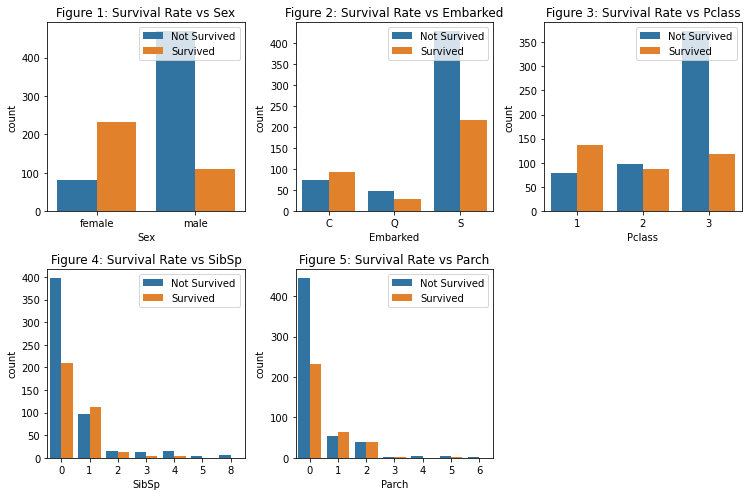

In [23]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index of plot
        if i< len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x = cols[i], hue= "Survived", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
            
ax.flat[-1].set_visible(False) # remove last
plt.tight_layout()
plt.show()
            
    

Observation:
Fig 1: Female survival rate > male
Fig 2: Most people come from S and highest death rate
Fig 3: 1 class higher surv rate
Fig 4 and 5: People goning alone highest death rate

EDA for numerical features


<AxesSubplot:xlabel='Age', ylabel='Count'>

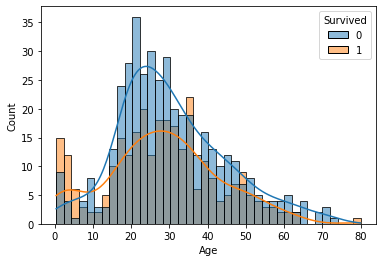

In [27]:
sns.histplot(data=train_df, x='Age', hue = "Survived", bins = 40, kde=True)

* Children had more chance to survive
* 18-20 high death rate

Fare

In [25]:
train_df["Fare"].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

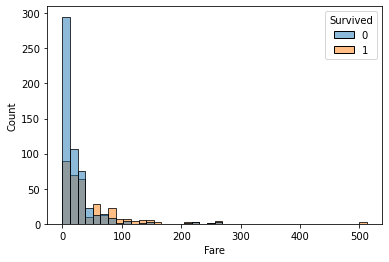

In [26]:
sns.histplot(data=train_df,hue = "Survived", x='Fare',  bins = 40, )

<AxesSubplot:xlabel='Fare', ylabel='count'>

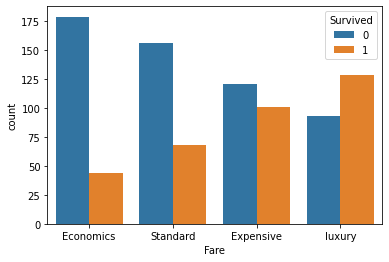

In [184]:
# name for 0-25%, 25-50, 50-75 , 75-100
fare_categories = ['Economics','Standard','Expensive','luxury']
quartile_data = pd.qcut(train_df["Fare"],4, labels = fare_categories)

sns.countplot(x=quartile_data, hue= train_df['Survived'])

Feature Engineering & Data wrangling 

Name

Regular Expression

In [185]:
train_df['Name'].head(20)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
11                      Sandstrom, Miss. Marguerite Rut
12                             Bonnell, Miss. Elizabeth
13                       Saundercock, Mr. William Henry
14                          Andersson, Mr. Anders Johan
15                 Vestrom, Miss. Hulda Amanda Adolfina
16                     Hewlett, Mrs. (Mary D Kingcome) 
17                                 Rice, Master. Eugene
18                         Williams,

In [186]:
import re 
def extract_title(name):
    pattern = re.compile(r",([\w\s]+)\.")
    return pattern.search(name).groups(1)[0].strip()

train_df['Title'] =train_df['Name'].apply(lambda name: extract_title(name))



In [187]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [188]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [189]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [190]:
def group_title(title):
    if title in ['Mr', 'Mrs','Miss','Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

train_df['Title'] =train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] =test_df['Title'].apply(lambda title: group_title(title))

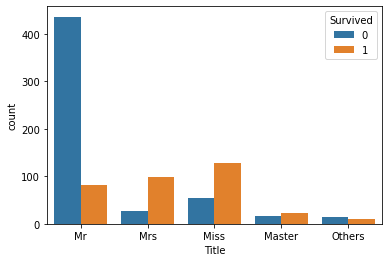

In [191]:
sns.countplot(data=train_df, x = "Title", hue = 'Survived');

In [192]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int')+1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + train_df['Parch'].astype('int')+1

In [193]:
train_df['Family_cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels=['Solo','Small','Medium','Large'])
test_df['Family_cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels=['Solo','Small','Medium','Large'])

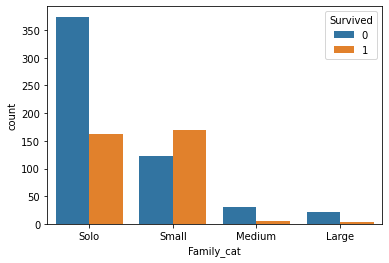

In [194]:
sns.countplot(data=train_df,x = 'Family_cat', hue = 'Survived');

Data Wrangling


In [195]:
num_features = ['Age', 'Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_cat']
features_cols = num_features + cat_features
print(features_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [196]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>0:
            print(f"{col} has{missing_count*100/n_rows:.2f}% missing values.")

display_missing(train_df,features_cols)
display_missing(test_df,features_cols)
            
            

Age has19.87% missing values.
Embarked has0.22% missing values.
Age has20.57% missing values.
Fare has0.24% missing values.
Family_cat has100.00% missing values.


Fill missing values

Age

In [197]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']

In [198]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [199]:
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age']= test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [200]:
display_missing(train_df, features_cols)
display_missing(test_df, features_cols)

Embarked has0.22% missing values.
Fare has0.24% missing values.
Family_cat has100.00% missing values.


In [201]:
X = train_df[features_cols]
Y = train_df['Survived']

In [202]:
X_test = test_df[features_cols]

In [203]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [204]:

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer,num_features),
    ('cat', cat_transformer,cat_features)
])

In [205]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [206]:
X = preprocessor.transform(X)

In [207]:
X_test = preprocessor.transform(X_test)

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2)

Model Training

In [210]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [211]:
X_test.shape


(418, 19)

In [212]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
# sklearn Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [213]:
log_reg = LogisticRegression(solver = 'liblinear',max_iter = 1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [214]:
log_reg.score(X_val, Y_val)

0.8044692737430168

In [215]:
y_pred = log_reg.predict(X_val)

In [216]:
precision_score(Y_val, y_pred), recall_score(Y_val, y_pred)

(0.7377049180327869, 0.703125)

In [217]:
print(classification_report(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       115
           1       0.74      0.70      0.72        64

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [218]:
poly = PolynomialFeatures(degree=5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [219]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
poly_log_reg.fit(poly_features_X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [220]:
poly_log_reg.score(poly_features_X_val,Y_val)

0.770949720670391

In [221]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=8,random_state=2022)
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [222]:
decision_tree.score(X_val,Y_val)

0.8044692737430168

Cross_validation

In [223]:
from sklearn.model_selection import cross_val_score

In [224]:
log_reg_cv = LogisticRegression(solver='liblinear',max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion ='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, Y, scoring='accuracy',error_score='raise',cv=5)


In [225]:
lr_scores.mean(),lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [226]:
dt_scores = cross_val_score(dt_cv, X, Y, scoring='accuracy',error_score='raise',cv=5)

In [227]:
dt_scores.mean(),dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

Baseline Model comparison

In [228]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(max_iter= 12000,random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski',p=2),
    LogisticRegression(solver='liblinear',max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=seed)
    
]


In [229]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X,Y, metrics,cv=5,plot_results=False):
    kfold = StratifiedKFold(cv, shuffle=True,random_state=seed)
    entries=[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,X,Y,scoring = metrics,cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
            
    cv_df = pd.DataFrame(entries,columns= ['model_name','fold_id','accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name',y ='accuracy_score',data= cv_df,showmeans=True)
        plt.title("Boxplot of Base-line Model Accuracy using 5Fold cross-validaition")
        plt.xticks(rotation=45)
        plt.show()
    
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean,std],axis = 1, ignore_index = True)
    baseline_results.columns = ['Mean','Standard Deviation']
    
    # Sort by accuracy
    baseline_results.sort_values(by = ['Mean'], ascending =  False, inplace = True) 
    
    return baseline_results
    
generate_baseline_results(models, X,Y, metrics='accuracy',cv=5,plot_results=False)        

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
XGBClassifier,0.824889,0.015407
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.809177,0.015221
ExtraTreesClassifier,0.804683,0.023237
DecisionTreeClassifier,0.794608,0.016252


Hyper-Parameter Tuning

In [230]:
kernel = ['linear', 'rbf','poly']
for i in kernel:
    model_SVC = SVC(kernel=i,C=1.0)
    model_SVC.fit(X_train,Y_train)
    print("for kernel:",i)
    print('Accuracy is:',model_SVC.score(X_val, Y_val))

for kernel: linear
Accuracy is: 0.8044692737430168
for kernel: rbf
Accuracy is: 0.8268156424581006
for kernel: poly
Accuracy is: 0.8212290502793296


=> choose kernel = linear

In [231]:
for i in range(1,10):
    model_SVC = SVC(kernel = 'poly',degree=i,C=100)
    model_SVC.fit(X_train, Y_train)
    print('Accuracy on testing data: \t',model_SVC.score(X_val,Y_val))
    print('Accuracy on testing data: \t',model_SVC.score(X_train,Y_train))

Accuracy on testing data: 	 0.8044692737430168
Accuracy on testing data: 	 0.8342696629213483
Accuracy on testing data: 	 0.7988826815642458
Accuracy on testing data: 	 0.8665730337078652
Accuracy on testing data: 	 0.7653631284916201
Accuracy on testing data: 	 0.8848314606741573
Accuracy on testing data: 	 0.776536312849162
Accuracy on testing data: 	 0.8960674157303371
Accuracy on testing data: 	 0.7821229050279329
Accuracy on testing data: 	 0.898876404494382
Accuracy on testing data: 	 0.776536312849162
Accuracy on testing data: 	 0.898876404494382
Accuracy on testing data: 	 0.770949720670391
Accuracy on testing data: 	 0.9044943820224719
Accuracy on testing data: 	 0.7597765363128491
Accuracy on testing data: 	 0.9101123595505618
Accuracy on testing data: 	 0.7597765363128491
Accuracy on testing data: 	 0.9115168539325843


In [232]:
from sklearn.model_selection import GridSearchCV

In [233]:
param_grid = {
    'C': [0.1,1,100,1000],
    'kernel':['rbf','poly','sigmoid','linear'],
    'degree': [1,2,3,4,5,6]
}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,Y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [234]:
print(grid.best_params_)
print(grid.score(X_val,Y_val))

{'C': 0.1, 'degree': 5, 'kernel': 'poly'}
0.8100558659217877


In [238]:
model_SVC = SVC(kernel = 'poly',degree=5,C=0.100)
model_SVC.fit(X_train,Y_train)
model_SVC.score(X_val,Y_val)

0.8100558659217877

In [241]:
y_pred = model_SVC.predict(X_val)

In [242]:
print(y_pred)

[1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0]
